In [1]:
# read csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

In [2]:
LUCAS_cqr = pd.read_csv('D:\Conformal_prediction_all_exprs\Conformal_Prediction_DSM\LUCAS_2015_BootRF.csv') #This is the final result of CQR
# LUCAS_cqr = pd.read_csv('D:\Conformalized_Quantile_Regression\LUCAS_2015_rf.csv') #This is the final result of RF

# LUCAS_all = pd.read_csv('D:\Conformalized_Quantile_Regression\LUCAS_2015_all.csv')

In [3]:
LUCAS_cqr

,BootRF_lower_oc,BootRF_upper_oc,BootRF_predicted_oc,BootRF_standard_uncertainty,BootRF_test_oc,BootRF_Point_ID
0,10.281106,15.951008,13.116057,0.109864,17.1,31302190
1,25.383073,36.942138,31.162606,0.223978,52.1,35262906
2,29.430188,45.921814,37.676001,0.319555,102.5,29702264
3,10.471563,15.386438,12.929001,0.095234,13.9,30902056
4,19.112609,35.065492,27.089051,0.309116,47.5,32062150
...,...,...,...,...,...,...
1995,15.115732,20.091812,17.603772,0.096420,13.4,27661882
1996,12.537208,19.513484,16.025346,0.135178,17.6,34502026
1997,15.934942,21.310980,18.622961,0.104170,57.3,42943686
1998,22.519371,40.524304,31.521838,0.348878,10.2,41083370


In [5]:
import uncertainty_toolbox as uct

y = np.asarray(LUCAS_cqr['BootRF_test_oc'])

predictions = list(zip(np.asarray(LUCAS_cqr['BootRF_lower_oc']), np.asarray(LUCAS_cqr['BootRF_upper_oc'])))
predictions_std = [np.std(sample) for sample in predictions]
y_pred = [np.mean(sample) for sample in predictions]

# Compute all uncertainty metrics
metrics = uct.metrics.get_all_metrics(np.array(y_pred), np.array(predictions_std), np.array(y))

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics
 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████| 10/10 [00:00<00:00, 13.23it/s]


  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████| 10/10 [00:00<00:00, 13.60it/s]


 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           15.080
  RMSE          37.614
  MDAE          6.586
  MARPD         43.029
  R2            0.283
  Correlation   0.562
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.271
  Mean-absolute Calibration Error       0.243
  Miscalibration Area                   0.245
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.263
     Group Size: 0.56 -- Calibration Error: 0.253
     Group Size: 1.00 -- Calibration Error: 0.243
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.311
     Group Size: 0.56 -- Calibration Error: 0.281
     Group Size: 1.00 -- Calibration Error: 0.271
=============

In [ ]:
# # Plot confidence bands on test data
# uct.viz.plot_xy(np.array(y_pred), np.array(predictions_std), np.array(y))
# plt.gcf().set_size_inches(8, 8)

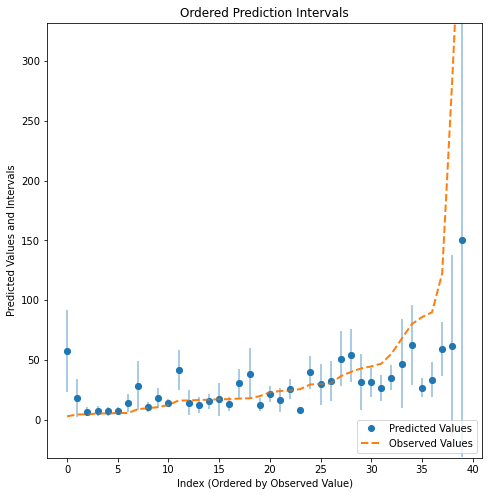

In [6]:
# Plot ordered prediction intervals
uct.viz.plot_intervals_ordered(np.array(y_pred[::50]), np.array(predictions_std[::50]), np.array(y[::50]))
plt.gcf().set_size_inches(8, 8)

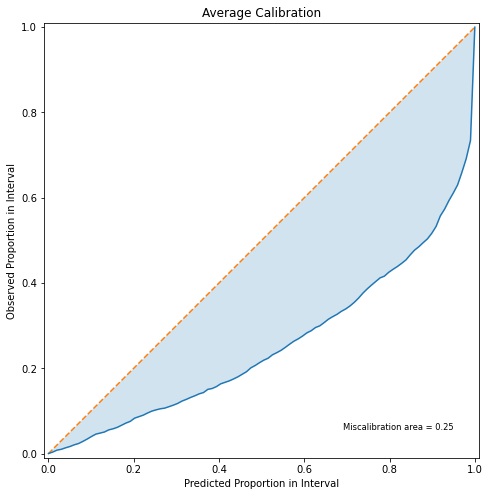

In [7]:
# Plot average calibration
uct.viz.plot_calibration(np.array(y_pred), np.array(predictions_std), np.array(y))
plt.gcf().set_size_inches(8, 8)

In [ ]:
LUCAS_all

In [ ]:
# List of columns to keep from LUCAS_all
columns_to_keep = ['Point_ID', 'long', 'lat', 'LC0_Desc', 'LC1_Desc', 'LU1_Desc']

In [ ]:
cqr_all = pd.merge(LUCAS_cqr, LUCAS_all[columns_to_keep], on='Point_ID', how='left')
cqr_all

In [ ]:
plt.figure(figsize=(20, 10))
colors = ['#43a2f8', '#f27085', '#2ca02c', '#ffd700']

plt.hist(cqr_all['standard_uncertainty'], bins=1000, alpha=0.5, label='y_real', color=colors[0])
# plt.hist(cqr_all['predicted_oc'], bins=100, alpha=0.5, label='y_rf', color=colors[1])

plt.legend(loc='upper right')
plt.show()

In [ ]:
# Define the bin edges and labels
bins = [-float('inf'), 1, float('inf')]
labels = ['Low', 'High']

# Use pd.cut to categorize the 'un' column
cqr_all['Category'] = pd.cut(cqr_all['standard_uncertainty'], bins=bins, labels=labels)

In [ ]:
cqr_all

In [ ]:
# Eliminate rows with 'Low' category
cqr_high = cqr_all[cqr_all['Category'] == 'High']

# Eliminate rows with 'Low' category
cqr_low = cqr_all[cqr_all['Category'] == 'Low']

In [ ]:
# cqr_all.to_csv('D:\Conformalized_Quantile_Regression\LUCAS_2015_cqr_all.csv', index = False)
# cqr_low.to_csv('D:\Conformalized_Quantile_Regression\LUCAS_2015_cqr_low.csv', index = False)
# cqr_high.to_csv('D:\Conformalized_Quantile_Regression\LUCAS_2015_cqr_high.csv', index = False)

In [ ]:
def plot_uncertainty(category_column, standard_uncertainty):
    # Get unique categories in the categorical column
    unique_categories = np.unique(category_column)

    # Calculate the mean MAE for each category
    mean_standard_uncertainty = []
    counts = []
    for category in unique_categories:
        category_indices = category_column == category
        category_standard_uncertainty = standard_uncertainty[category_indices]
        mean_standard_uncertainty.append(np.mean(category_standard_uncertainty))
        counts.append(np.sum(category_indices))

    plt.figure(figsize=(20, 10), facecolor='white')
    # Create a ScalarMappable object to map colors to counts
    norm = plt.Normalize(min(counts), max(counts))
    cmap = cm.get_cmap('coolwarm')
    sm = cm.ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])

    # Plot the bar plot with colored bars
    bars = plt.bar(unique_categories, mean_standard_uncertainty, color=sm.to_rgba(counts))

    # Create a color legend
    cbar = plt.colorbar(sm)
    cbar.set_label('Counts')

    # Rotate x-axis labels (if needed)
    plt.xticks(rotation=90)  # You can adjust the rotation as needed

    plt.xlabel('Categories')
    plt.ylabel('Mean standard_uncertainty')
    plt.title('Mean standard_uncertainty per Category')
    plt.show()


In [ ]:
# Example usage
category_column = cqr_all['LC0_Desc']  # Replace 'Category' with the name of your categorical column
standard_uncertainty = cqr_all['standard_uncertainty']
plot_uncertainty(category_column, standard_uncertainty )

In [ ]:
def plot_func_data(y_test,y_lower,y_upper,name=""):
    """ Plot the test labels along with the constructed prediction band

    Parameters
    ----------

    y_test : numpy array, true labels (n)
    y_lower : numpy array, estimated lower bound for the labels (n)
    y_upper : numpy array, estimated upper bound for the labels (n)
    name : string, optional output string (e.g. the method name)

    """

    # allowed to import graphics
    import matplotlib.pyplot as plt

    interval = y_upper - y_lower
    sort_ind = np.argsort(interval)
    y_test_sorted = y_test[sort_ind]
    upper_sorted = y_upper[sort_ind]
    lower_sorted = y_lower[sort_ind]
    mean = (upper_sorted + lower_sorted) / 2

    # # Center such that the mean of the prediction interval is at 0.0
    # y_test_sorted -= mean
    # upper_sorted -= mean
    # lower_sorted -= mean

    plt.figure(figsize=(20, 10), facecolor='white')
    # Plot each sample as a circle with a black edge and transparent filling
    plt.scatter(range(len(y_test_sorted)), y_test_sorted,
                 label='Test Values', color='none', edgecolors='black', alpha=0.3, marker='o')
    plt.fill_between(
        np.arange(len(upper_sorted)), lower_sorted, upper_sorted, alpha=0.2, color="r",
        label="Pred. interval")
    plt.xlabel("Ordered samples", fontsize=14, fontweight='bold')
    plt.ylabel("Values and prediction intervals", fontsize=14, fontweight='bold')

    plt.title(name, fontsize=16, fontweight='bold')
    plt.show()

    # interval = y_upper - y_lower
    # sort_ind = np.argsort(y_test)
    # y_test_sorted = y_test[sort_ind]
    # upper_sorted = y_upper[sort_ind]
    # lower_sorted = y_lower[sort_ind]

    # plt.figure(figsize=(20, 10), facecolor='white')
    # plt.scatter(range(len(y_test_sorted)), y_test_sorted,
    #              label='Test Values', color='none', edgecolors='black', alpha=0.3, marker='o')
    # plt.fill_between(
    #     np.arange(len(upper_sorted)), lower_sorted, upper_sorted, alpha=0.2, color="r",
    #     label="Pred. interval")
    # plt.xlabel("Ordered samples by response")
    # plt.ylabel("Values and prediction intervals")

    # plt.title(name)
    # plt.show()


In [ ]:
# Get unique categories from the 'LC0_Desc' column
unique_categories = cqr_all['LC0_Desc'].unique()

# Iterate through unique categories
for category in unique_categories:
    # Filter the DataFrame to include only rows where 'LC0_Desc' equals the current category
    filtered_df = cqr_all[cqr_all['LC0_Desc'] == category]
    
    # Reset the index of filtered_df
    filtered_df = filtered_df.reset_index(drop=True)
    
    # Extract the relevant columns for the function
    y_test = filtered_df['test_oc']  # Replace with the actual column name
    y_lower = filtered_df['lower_oc']  # Replace with the actual column name
    y_upper = filtered_df['upper_oc']  # Replace with the actual column name
    
    # Call the plot_func_data function with the filtered data and a custom name
    plot_func_data(y_test, y_lower, y_upper, name=f"Category: {category}")


# plot_func_data(filtered_df['test_oc'],filtered_df['lower_oc'],filtered_df['upper_oc'],"RF")